# Penalizing Functions Study

In [9]:
import numpy as np
import numexpr as ne
import matplotlib.pyplot as plt

target_path = '/Users/martin/Dropbox/Aplicaciones/ShareLaTeX/VarClump/'

In [2]:
def psi(x, lamb=1.):
    x = lamb*x
    ret = np.empty(x.shape)
    mask0 = x<=0.
    mask1 = x>=1.
    mask01 = np.logical_and(np.logical_not(mask0),np.logical_not(mask1))
    ret[mask0] = 0.
    ret[mask1] = 1.
    #evaluation on 0-1
    x = x[mask01]
    ret[mask01] = ne.evaluate('10*x**3 - 15*x**4 + 6*x**5')
    return ret

def d1psi(x, lamb=1.):
    x = lamb*x
    ret = np.empty(x.shape)
    mask0 = x<=0.
    mask1 = x>=1.
    mask01 = np.logical_and(np.logical_not(mask0),np.logical_not(mask1))
    ret[mask0] = 0.
    ret[mask1] = 0.
    #evaluation on 0-1
    x = x[mask01]
    ret[mask01] = ne.evaluate('30*x**2 - 60*x**3 + 30*x**4')
    return lamb*ret

def d2psi(x, lamb=1.):
    x = lamb*x
    ret = np.empty(x.shape)
    mask0 = x<=0.
    mask1 = x>=1.
    mask01 = np.logical_and(np.logical_not(mask0),np.logical_not(mask1))
    ret[mask0] = 0.
    ret[mask1] = 0.
    #evaluation on 0-1
    x = x[mask01]
    ret[mask01] = ne.evaluate('60*x - 180*x**2 + 120*x**3')
    return (lamb**2)*ret

In [3]:
xgrid = np.linspace(-0.05, 1.05, 200)
lambs = np.arange(1., 10.)
#lambs = np.array([1., 3., 5., 7., 9., 10.])

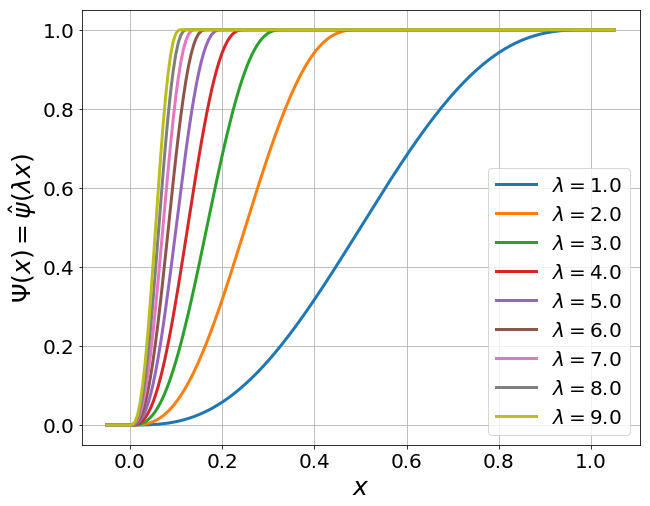

In [10]:
plt.figure(figsize=(10,8))
plt.grid()
#plt.title("5th order spline penalizing function")
plt.xlabel("$x$", fontsize=25)
plt.ylabel("$\Psi(x) = \hat{\psi}(\lambda x)$", fontsize=25)
for lamb in lambs:
    plt.plot(xgrid, psi(xgrid, lamb=lamb), linewidth=3.0, label="$\lambda = {:2.1f}$".format(lamb))
plt.legend(loc='best', prop={'size':20})
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig(target_path+'penalizing_function.eps', format='eps', dpi=1000)
plt.show()